## **Diabetes Dataset**

# Context
This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective is to predict based on diagnostic measurements whether a patient has diabetes.

# Content
Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

1. Pregnancies: Number of times pregnant
2. Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
3. BloodPressure: Diastolic blood pressure (mm Hg)
4. SkinThickness: Triceps skin fold thickness (mm)
5. Insulin: 2-Hour serum insulin (mu U/ml)
6. BMI: Body mass index (weight in kg/(height in m)^2)
7. DiabetesPedigreeFunction: Diabetes pedigree function
8. Age: Age (years)
9. Outcome: Class variable (0 or 1)

## Importing Dependencies

In [4]:
# Print multiple statements in same line
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [5]:
# Import necessary libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, confusion_matrix

## Reading the Data

In [6]:
df = pd.read_excel('diabetes.xlsx')

In [7]:
df.shape
df.head()
df.info()
df.isna().sum()

(768, 9)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

## Data Cleaning

### Missing Values

In [8]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

As we can see there are no missing values in the given dataset we will skip this step and move to the next step, i.e, Data Analysis

## Data Analysis

### Outlier Check

<Figure size 400x300 with 0 Axes>

<Axes: xlabel='Pregnancies', ylabel='Count'>

Text(0.5, 0, 'Pregnancies')

Text(0, 0.5, 'Frequency')

Text(0.5, 1.0, 'Pregnancies')

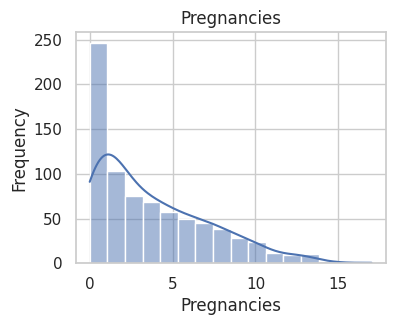

<Figure size 400x300 with 0 Axes>

<Axes: xlabel='Glucose', ylabel='Count'>

Text(0.5, 0, 'Glucose')

Text(0, 0.5, 'Frequency')

Text(0.5, 1.0, 'Glucose')

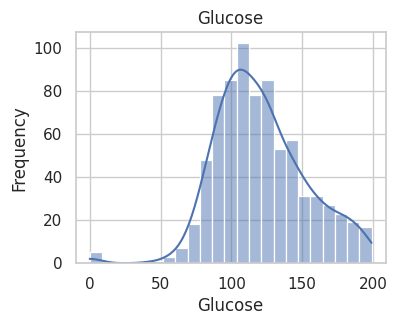

<Figure size 400x300 with 0 Axes>

<Axes: xlabel='BloodPressure', ylabel='Count'>

Text(0.5, 0, 'BloodPressure')

Text(0, 0.5, 'Frequency')

Text(0.5, 1.0, 'BloodPressure')

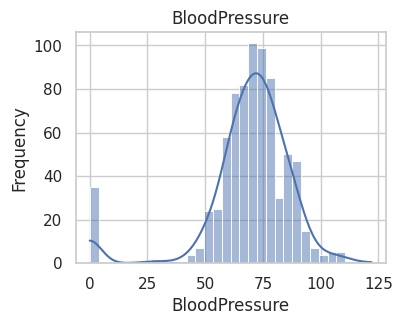

<Figure size 400x300 with 0 Axes>

<Axes: xlabel='SkinThickness', ylabel='Count'>

Text(0.5, 0, 'SkinThickness')

Text(0, 0.5, 'Frequency')

Text(0.5, 1.0, 'SkinThickness')

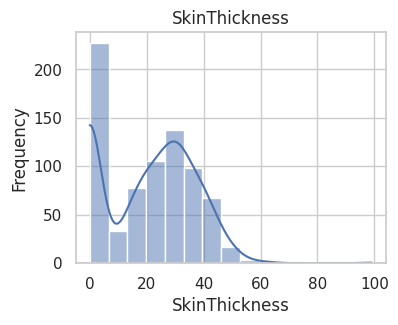

<Figure size 400x300 with 0 Axes>

<Axes: xlabel='Insulin', ylabel='Count'>

Text(0.5, 0, 'Insulin')

Text(0, 0.5, 'Frequency')

Text(0.5, 1.0, 'Insulin')

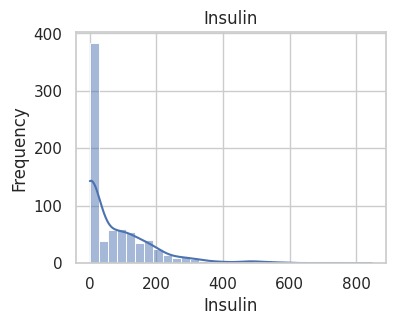

<Figure size 400x300 with 0 Axes>

<Axes: xlabel='BMI', ylabel='Count'>

Text(0.5, 0, 'BMI')

Text(0, 0.5, 'Frequency')

Text(0.5, 1.0, 'BMI')

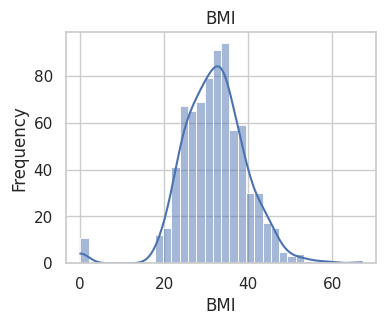

<Figure size 400x300 with 0 Axes>

<Axes: xlabel='DiabetesPedigreeFunction', ylabel='Count'>

Text(0.5, 0, 'DiabetesPedigreeFunction')

Text(0, 0.5, 'Frequency')

Text(0.5, 1.0, 'DiabetesPedigreeFunction')

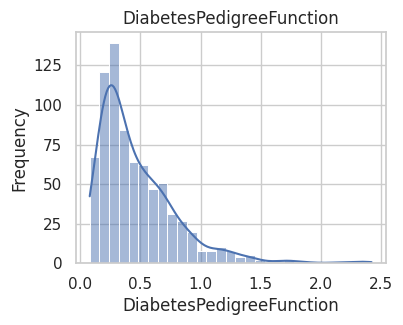

<Figure size 400x300 with 0 Axes>

<Axes: xlabel='Age', ylabel='Count'>

Text(0.5, 0, 'Age')

Text(0, 0.5, 'Frequency')

Text(0.5, 1.0, 'Age')

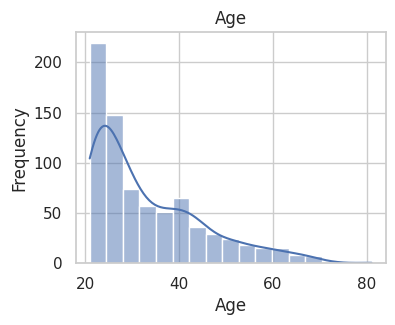

<Figure size 400x300 with 0 Axes>

<Axes: xlabel='Outcome', ylabel='Count'>

Text(0.5, 0, 'Outcome')

Text(0, 0.5, 'Frequency')

Text(0.5, 1.0, 'Outcome')

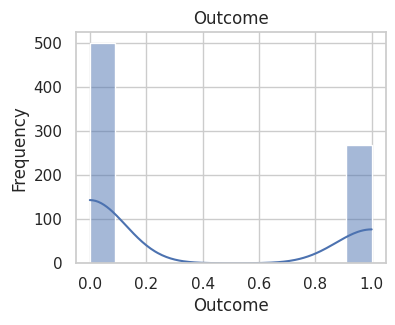

In [9]:
for i in df.columns:
    # Plot settings
    plt.figure(figsize=(4,3))
    sns.set(style="whitegrid")

    # Plot the bell curve for Fare
    sns.histplot(data=df, x=i, kde=True)

    # Add labels and title for Fare plot
    plt.xlabel(i)
    plt.ylabel('Frequency')
    plt.title( i)

    # Show the Fare plot
    plt.show()

In [10]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Model Building

In [11]:
# Prepare features and target variable
X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [12]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [14]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score

def evaluate_model(model, X, y, dataset_name):
    y_pred = model.predict(X)
    cm = confusion_matrix(y, y_pred)

    print(f"Confusion Matrix for {dataset_name} dataset:")
    print(cm)  # Display actual values in confusion matrix

    # Plot confusion matrix with numbers
    plt.figure(figsize=(4, 3))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix for {dataset_name} dataset')
    plt.colorbar()

    classes = ['Not Survived', 'Survived']
    plt.xticks([0, 1], classes)
    plt.yticks([0, 1], classes)

    # Display numbers in the matrix cells
    thresh = cm.max() / 2.0
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, format(cm[i, j], 'd'),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

    print(f"\nClassification Report for {dataset_name} dataset:\n{classification_report(y, y_pred)}")

    # Calculate ROC curve
    y_prob = model.predict_proba(X)[:, 1]
    fpr, tpr, thresholds = roc_curve(y, y_prob)

    # Plot ROC curve
    plt.figure(figsize=(4, 3))
    plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {dataset_name} dataset')
    plt.legend(loc="lower right")
    plt.show()

    auc_score = roc_auc_score(y, y_prob)
    print(f"\nAUC Score for {dataset_name} dataset: {auc_score:.4f}")

## LogisticRegression

In [15]:
# Build and train the logistic regression model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

LogisticRegression()

Confusion Matrix for Test dataset:
[[79 20]
 [18 37]]


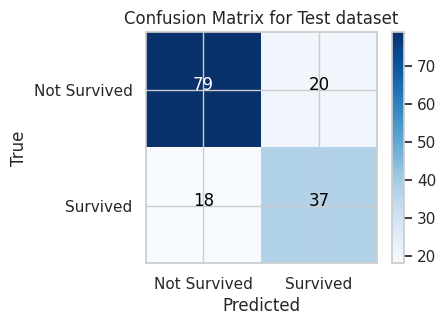


Classification Report for Test dataset:
              precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



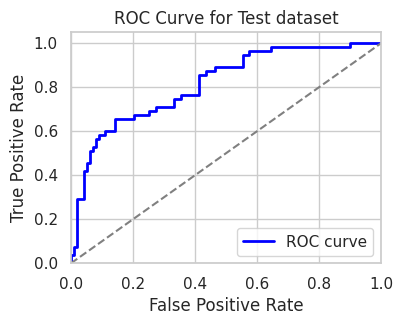


AUC Score for Test dataset: 0.8147
----------------------------------------------------------------------------------------------------
Confusion Matrix for Train dataset:
[[354  47]
 [ 94 119]]


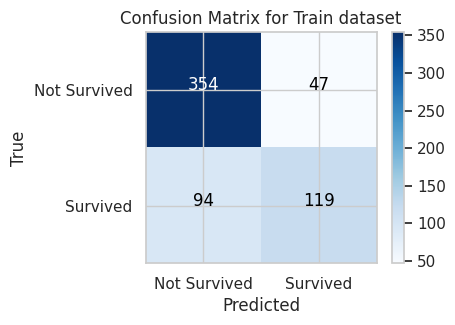


Classification Report for Train dataset:
              precision    recall  f1-score   support

           0       0.79      0.88      0.83       401
           1       0.72      0.56      0.63       213

    accuracy                           0.77       614
   macro avg       0.75      0.72      0.73       614
weighted avg       0.76      0.77      0.76       614



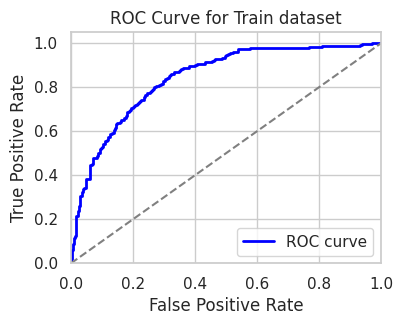


AUC Score for Train dataset: 0.8428


In [16]:
# Call the function for the test dataset
evaluate_model(model, X_test_scaled, y_test, "Test")

print('-'*100)
# Call the function for the train dataset
evaluate_model(model, X_train_scaled, y_train, "Train")

##  DecisionTreeClassifier

In [17]:
#importing the library
from sklearn.tree import DecisionTreeClassifier

In [18]:
# Build and train the Decision Tree model
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train_scaled, y_train)

DecisionTreeClassifier(random_state=42)

Confusion Matrix for Decision Tree (Test) dataset:
[[75 24]
 [15 40]]


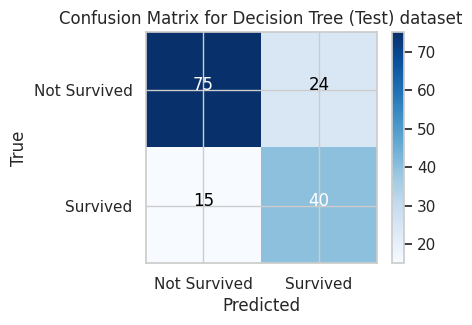


Classification Report for Decision Tree (Test) dataset:
              precision    recall  f1-score   support

           0       0.83      0.76      0.79        99
           1       0.62      0.73      0.67        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



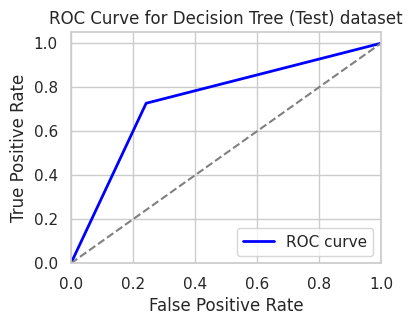


AUC Score for Decision Tree (Test) dataset: 0.7424
----------------------------------------------------------------------------------------------------
Confusion Matrix for Decision Tree (Train) dataset:
[[401   0]
 [  0 213]]


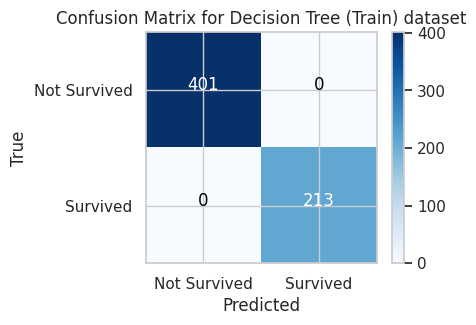


Classification Report for Decision Tree (Train) dataset:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       401
           1       1.00      1.00      1.00       213

    accuracy                           1.00       614
   macro avg       1.00      1.00      1.00       614
weighted avg       1.00      1.00      1.00       614



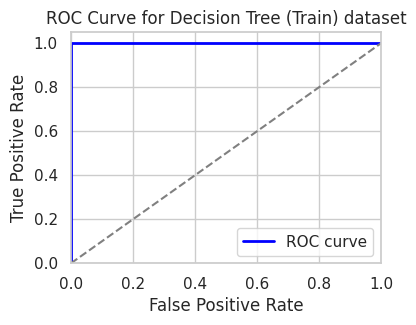


AUC Score for Decision Tree (Train) dataset: 1.0000


In [19]:
# Call the function for Decision Tree model on the test dataset
evaluate_model(tree_model, X_test_scaled, y_test, "Decision Tree (Test)")

print('-'*100)
# Call the function for Decision Tree model on the train dataset
evaluate_model(tree_model, X_train_scaled, y_train, "Decision Tree (Train)")

### Visualisation of Decision Tree

In [20]:
!pip install graphviz

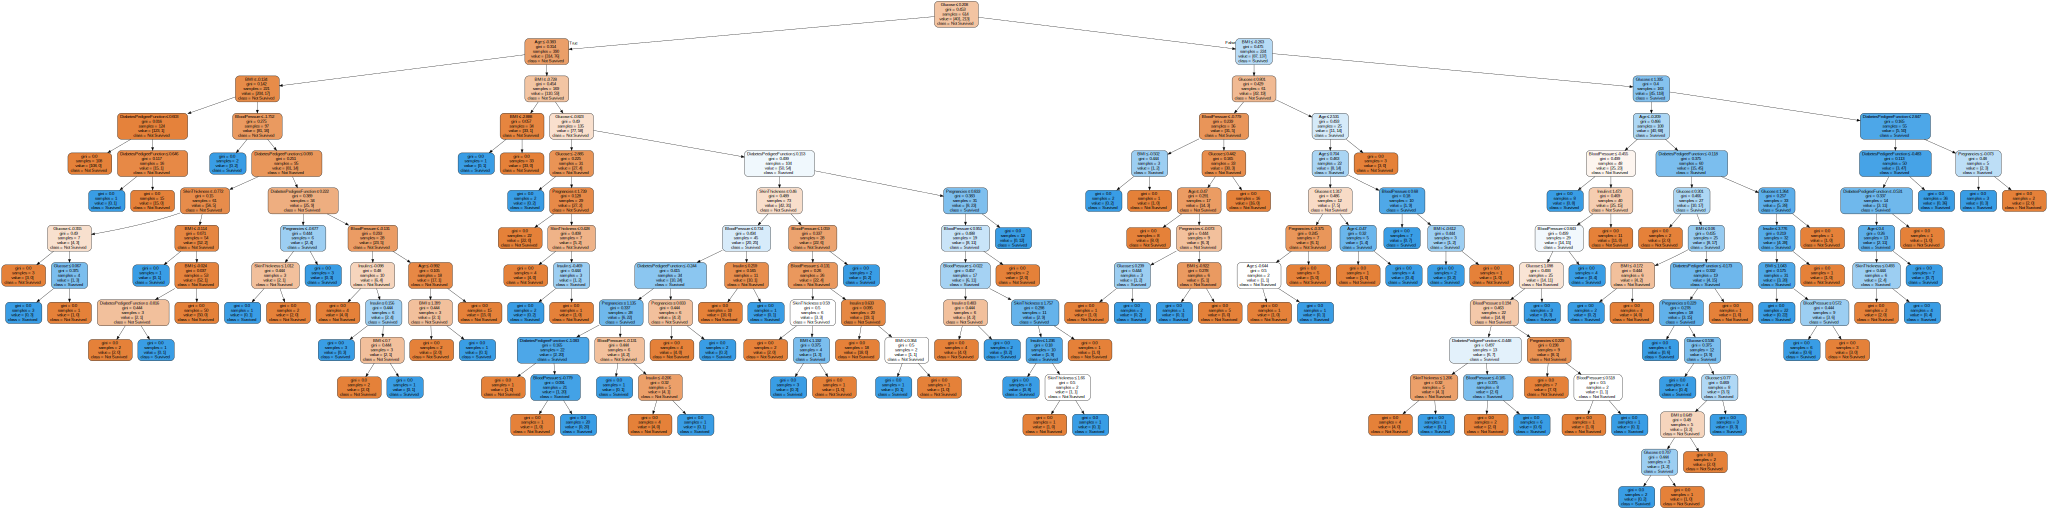

In [21]:
from sklearn.tree import export_graphviz
from IPython.display import display
import graphviz

# Export the Decision Tree to DOT format
dot_data = export_graphviz(tree_model, out_file=None,
                           feature_names=X_train.columns,
                           class_names=['Not Survived', 'Survived'],
                           filled=True, rounded=True,
                           special_characters=True)

# Create a Graphviz object and display it
graph = graphviz.Source(dot_data)
# graph.view()
display(graph)

### Hyper Parameter tuning for DT

In [22]:
from sklearn.model_selection import GridSearchCV, train_test_split

In [23]:
# Define the parameter grid for hyperparameter tuning
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [24]:
# Create a GridSearchCV instance with the DecisionTreeClassifier, parameter grid, and accuracy scoring
tree_model = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(estimator=tree_model, param_grid=param_grid, cv=5, scoring='accuracy')

In [25]:
# Perform hyperparameter tuning using GridSearchCV on the training data
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [26]:
# Print the best hyperparameters found
print("Best hyperparameters:", grid_search.best_params_)

Best hyperparameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10}


In [27]:
# Get the best model from the grid search
best_tree_model = grid_search.best_estimator_

In [28]:
# Save results to a CSV file
results = pd.DataFrame(grid_search.cv_results_)
results.to_csv('results.csv')

###  Cross validation on DT

In [29]:
from sklearn.model_selection import cross_val_score

In [30]:
# Perform K-fold cross-validation for accuracy using the best model
num_folds = 5
cross_val_scores = cross_val_score(best_tree_model, X_train_scaled, y_train, cv=num_folds, scoring='accuracy')

In [31]:
# Print the cross-validation accuracy scores for each fold
for fold_num, score in enumerate(cross_val_scores, start=1):
    print(f"Fold {fold_num} score: {score:.4f}")

Fold 1 score: 0.7886
Fold 2 score: 0.8130
Fold 3 score: 0.6911
Fold 4 score: 0.7154
Fold 5 score: 0.7049


In [32]:
mean_accuracy_score = cross_val_scores.mean()
print(f"Mean accuracy score: {mean_accuracy_score:.4f}")

Mean accuracy score: 0.7426


### Threshold Change for DT

In [33]:
from sklearn.metrics import f1_score, precision_recall_curve

# Fit the best model on the entire training data
best_tree_model.fit(X_train_scaled, y_train)

# Predict probabilities for the positive class
y_prob = best_tree_model.predict_proba(X_train_scaled)[:, 1]

DecisionTreeClassifier(criterion='entropy', min_samples_leaf=2,
                       min_samples_split=10, random_state=42)

In [34]:
# Set a random threshold
random_threshold = 0.6

# Predict binary labels using the random threshold
y_pred = (y_prob >= random_threshold).astype(int)

In [35]:
# Calculate F1 score on the training data using the random threshold
train_f1_score = f1_score(y_train, y_pred)
print("F1 score on training data with random threshold:", train_f1_score)

F1 score on training data with random threshold: 0.8702290076335878


### Feature importance

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='Importance', ylabel='Feature'>

Text(0.5, 1.0, 'Decision Tree Feature Importances')

Text(0.5, 0, 'Importance')

Text(0, 0.5, 'Feature')

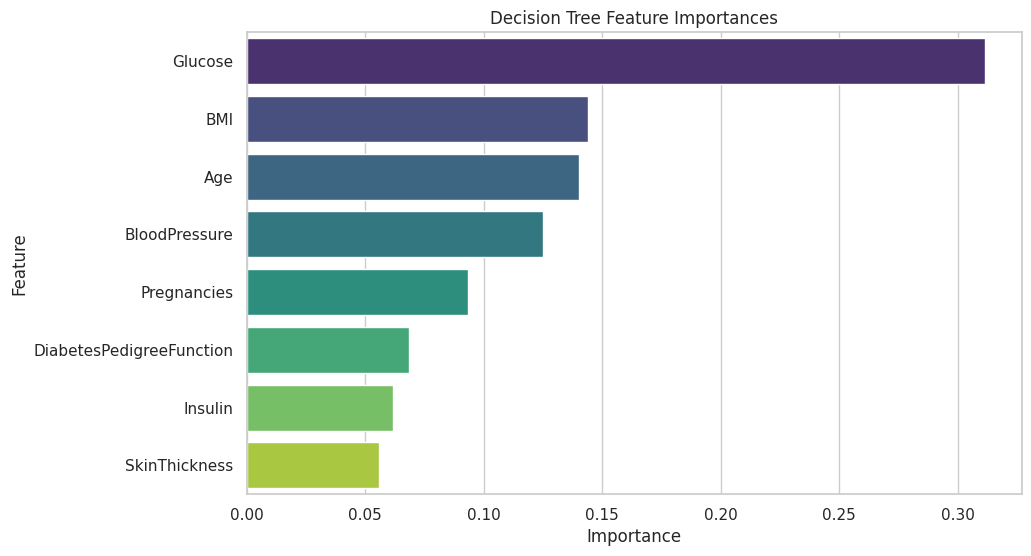

In [36]:
# Get feature importances for Decision Tree
feature_importances_dt = best_tree_model.feature_importances_

# Create a DataFrame to store feature importances along with their corresponding feature names
importances_dt_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances_dt})

# Sort the DataFrame by importance in descending order
importances_dt_df = importances_dt_df.sort_values(by='Importance', ascending=False)

# Create a bar plot to visualize feature importances for Decision Tree
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importances_dt_df, palette='viridis')
plt.title("Decision Tree Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()


## RandomForestClassifier

In [37]:
from sklearn.ensemble import RandomForestClassifier

In [38]:
# Build and train the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

Confusion Matrix for Random Forest (Test) dataset:
[[77 22]
 [21 34]]


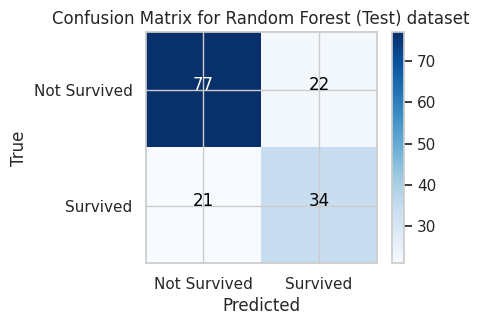


Classification Report for Random Forest (Test) dataset:
              precision    recall  f1-score   support

           0       0.79      0.78      0.78        99
           1       0.61      0.62      0.61        55

    accuracy                           0.72       154
   macro avg       0.70      0.70      0.70       154
weighted avg       0.72      0.72      0.72       154



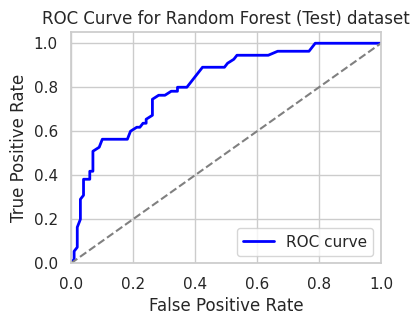


AUC Score for Random Forest (Test) dataset: 0.8125
----------------------------------------------------------------------------------------------------
Confusion Matrix for Random Forest (Train) dataset:
[[401   0]
 [  0 213]]


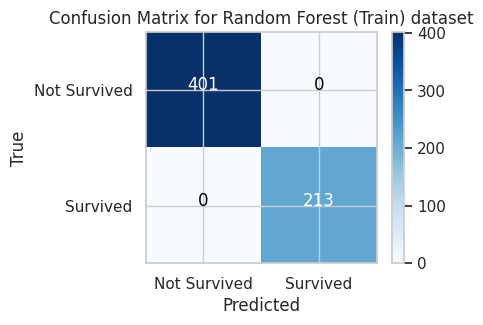


Classification Report for Random Forest (Train) dataset:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       401
           1       1.00      1.00      1.00       213

    accuracy                           1.00       614
   macro avg       1.00      1.00      1.00       614
weighted avg       1.00      1.00      1.00       614



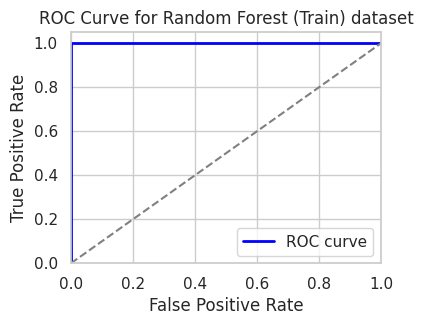


AUC Score for Random Forest (Train) dataset: 1.0000


In [39]:
# Call the function for Random Forest model on the test dataset
evaluate_model(rf_model, X_test_scaled, y_test, "Random Forest (Test)")

print('-'*100)
# Call the function for Random Forest model on the train dataset
evaluate_model(rf_model, X_train_scaled, y_train, "Random Forest (Train)")

### Hyper Parameter tuning for DT

In [40]:
# Perform hyperparameter tuning for Random Forest
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
    }


In [41]:
rf_grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, cv=5, scoring='accuracy')
rf_grid_search.fit(X_train_scaled, y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [42]:
print("Best hyperparameters for Random Forest:", rf_grid_search.best_params_)
best_rf_model = rf_grid_search.best_estimator_

Best hyperparameters for Random Forest: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}


### CV for RF

In [43]:
# Perform K-fold cross-validation for accuracy using the best Random Forest model
cross_val_scores_rf = cross_val_score(best_rf_model, X_train_scaled, y_train, cv=num_folds, scoring='accuracy')
for fold_num, score in enumerate(cross_val_scores_rf, start=1):
    print(f"Fold {fold_num} score (Random Forest): {score:.4f}")

Fold 1 score (Random Forest): 0.7642
Fold 2 score (Random Forest): 0.8293
Fold 3 score (Random Forest): 0.7561
Fold 4 score (Random Forest): 0.7561
Fold 5 score (Random Forest): 0.8197


In [44]:
mean_accuracy_score_rf = cross_val_scores_rf.mean()
print(f"Mean accuracy score (Random Forest): {mean_accuracy_score_rf:.4f}")

Mean accuracy score (Random Forest): 0.7851


### Threshold Change for RF

In [45]:
# Fit the best Random Forest model on the entire training data
best_rf_model.fit(X_train_scaled, y_train)

# Predict probabilities for the positive class using Random Forest
y_prob_rf = best_rf_model.predict_proba(X_train_scaled)[:, 1]

RandomForestClassifier(max_depth=10, min_samples_leaf=4, min_samples_split=10,
                       random_state=42)

In [46]:
# Set a random threshold for Random Forest
random_threshold_rf = 0.6

# Predict binary labels using the random threshold for Random Forest
y_pred_rf = (y_prob_rf >= random_threshold_rf).astype(int)

In [47]:
# Calculate F1 score on the training data using the random threshold for Random Forest
train_f1_score_rf = f1_score(y_train, y_pred_rf)
print("F1 score on training data with random threshold (Random Forest):", train_f1_score_rf)

F1 score on training data with random threshold (Random Forest): 0.7799442896935933


### Feature Importances for RF

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='Importance', ylabel='Feature'>

Text(0.5, 1.0, 'Random Forest Feature Importances')

Text(0.5, 0, 'Importance')

Text(0, 0.5, 'Feature')

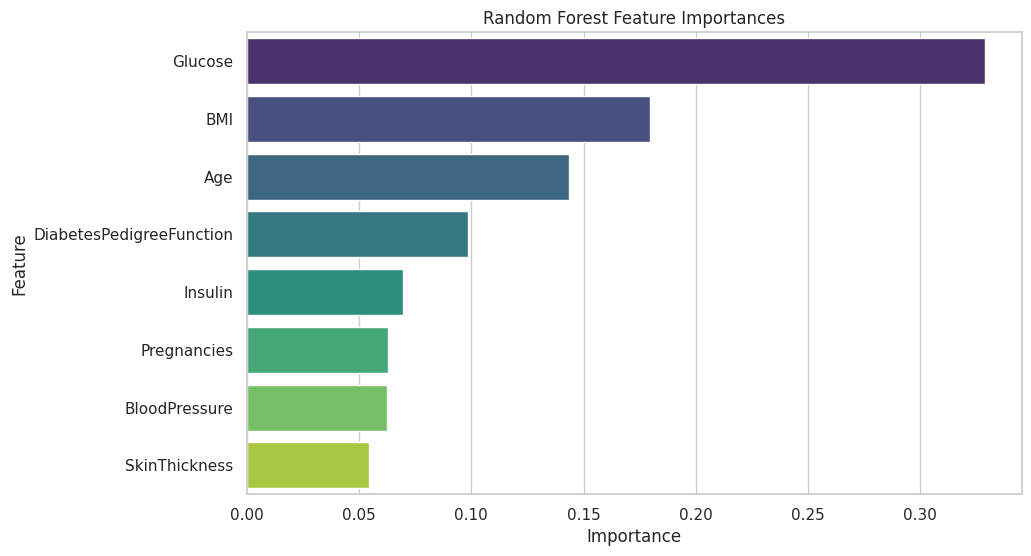

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importances for Random Forest
feature_importances_rf = best_rf_model.feature_importances_

# Create a DataFrame to store feature importances along with their corresponding feature names
importances_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances_rf})

# Sort the DataFrame by importance in descending order
importances_df = importances_df.sort_values(by='Importance', ascending=False)

# Create a bar plot to visualize feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importances_df, palette='viridis')
plt.title("Random Forest Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()